In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import cv2
import numpy as np
import os
from imutils import paths

In [ ]:
images = "C:\\Users\\nisha\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\train"

In [ ]:
folders = os.listdir(images)
print(folders)

['Normal', 'Osteoarthritis']


In [ ]:
image_data= []
labels = []

In [ ]:
label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

In [ ]:
from keras.preprocessing import image

for ix in folders:
  path = os.path.join(images,ix)
  for im in os.listdir(path):
    img = image.load_img(os.path.join(path,im),target_size=((512,512)))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    labels.append(label_dict[ix])

In [ ]:
print(len(image_data),len(labels))

2350 2350


In [ ]:
combined = list(zip(image_data,labels))
image_data[:],labels[:] = zip(*combined)

In [ ]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350,)


In [ ]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(2350, 512, 512, 3) (2350, 2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Augmentation
augment = ImageDataGenerator( 
                             rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [ ]:
#CNN MODEL
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(512,512,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="osteoarthritis_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 510, 510, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 255, 255, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 253, 253, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 64)       

In [ ]:
hist = model.fit(x_train,y_train,
                    shuffle = True,
                    batch_size=32,
                    epochs = 30,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 3.2540 - accuracy: 0.6090
Epoch 00001: val_loss improved from inf to 1.65689, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 182s 3s/step - loss: 3.2540 - accuracy: 0.6090 - val_loss: 1.6569 - val_accuracy: 1.0000
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 1.7720 - accuracy: 0.6180
Epoch 00002: val_loss improved from 1.65689 to 1.25565, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 192s 3s/step - loss: 1.7720 - accuracy: 0.6180 - val_loss: 1.2556 - val_accuracy: 1.0000
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 1.5789 - accuracy: 0.6109
Epoch 00003: val_loss improved from 1.25565 to 1.14441, saving model to osteoarthritis_detection.hdf5
67/67 [==============================] - 209s 3s/step - loss: 1.5789 - accuracy: 0.6109 - val_loss: 1.1444 - val_accuracy: 1.0000
Epoch 4/30
67/67 [========

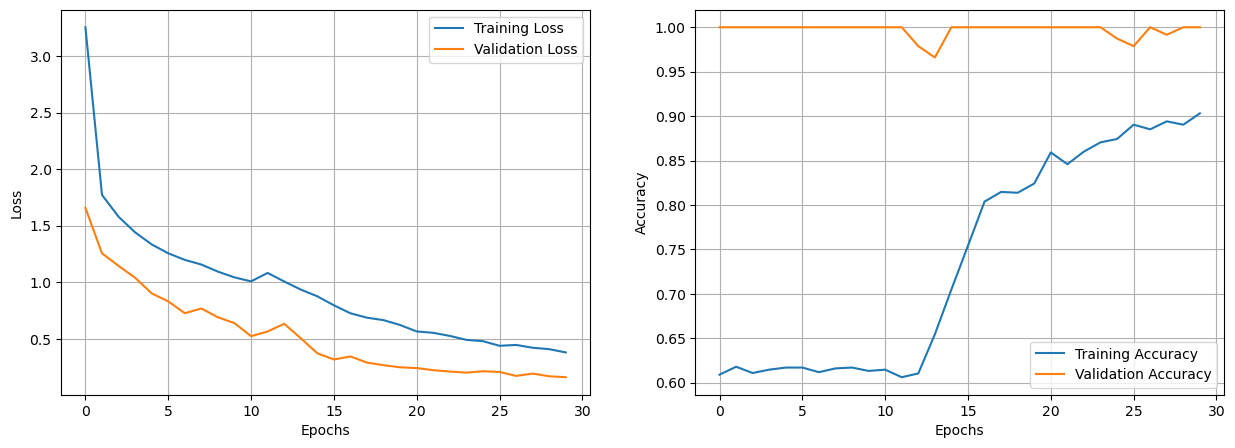

In [ ]:
from matplotlib import pyplot as plt
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()
plt.savefig("Figure 2.jpg")

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.savefig("figure 3.jpg")

In [ ]:
model.evaluate(x_train,y_train)

74/74 [==============================] - 43s 585ms/step - loss: 0.3286 - accuracy: 0.9353


[0.32858169078826904, 0.9353191256523132]

In [ ]:
#TESTING THE cnn MODEL'S PERFORMANCE
test_images = "C:\\Users\\nisha\\Desktop\\[KNEE OSTEOARTHRITIS]\\data 2\\Osteoarthritis Dataset\\valid"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'Normal':0,
    'Osteoarthritis':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((512,512)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)

['Normal', 'Osteoarthritis']
(641, 512, 512, 3) (641, 2)


In [ ]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 15s 728ms/step - loss: 0.3970 - accuracy: 0.9095


[0.3970327079296112, 0.9095163941383362]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [ ]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85       210
           1       0.90      0.97      0.94       431

    accuracy                           0.91       641
   macro avg       0.92      0.88      0.89       641
weighted avg       0.91      0.91      0.91       641



In [ ]:
print(confusion_matrix(test_labels, pred))

[[163  47]
 [ 11 420]]


Normalized Confusion Matrix: 
[[0.78 0.22]
 [0.03 0.97]]


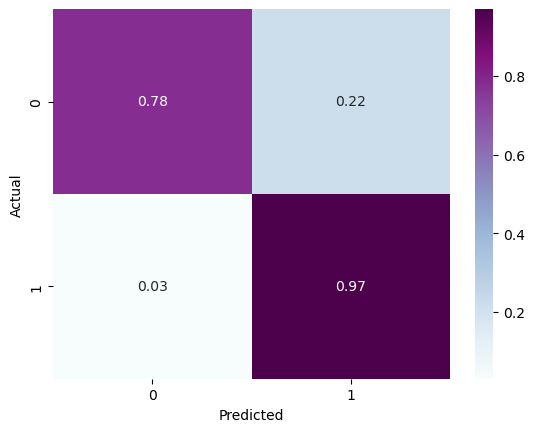

In [ ]:
# Normalized Confusion Matrix
import numpy as np
import seaborn as sns
print("Normalized Confusion Matrix: ")
cm_normalized = np.round(confusion_matrix(test_labels, pred)/np.sum(confusion_matrix(test_labels, pred), axis = 1).reshape(-1, 1),2)
print(cm_normalized)
sns.heatmap(cm_normalized, annot = True, cmap = "BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
sensitivity1 = confusion_matrix(test_labels, pred)[0,0]/(confusion_matrix(test_labels, pred)[0,0]+confusion_matrix(test_labels, pred)[0,1])
print('Sensitivity : ', sensitivity1 )

Sensitivity :  0.7761904761904762


In [ ]:
specificity1 = confusion_matrix(test_labels, pred)[1,1]/(confusion_matrix(test_labels, pred)[1,0]+confusion_matrix(test_labels, pred)[1,1])
print('Specificity : ', specificity1)

Specificity :  0.974477958236659


In [ ]:
# predict probabilities
pred_prob1 = model.predict_proba(x_test)

Instructions for updating:
Please use `model.predict()` instead.


In [33]:
from sklearn.metrics import roc_curve, auc

history = model.fit(x_train, y_train, validation_data=(
        x_test, y_test), epochs= , batch_size= 32, verbose=1)

y_pred = model.predict(x_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_score)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)


Epoch 1/30
